# Aidan Elliott

## Research question/interests

Most scientists agree that climate change has been significantly accelerated due to human expansion. The rate at which countries emmit C02 varies greatly due to population, gdp, etc. However, I want to explore whether the more carbon a country emits affects their increase in temperature locally greater than their global affect. We can get significant insight to this question by examining a dataset containing emission data by country over time with another dataset tracking average temperature by country over time.

# Importing my Datasets

In [ ]:
import pandas as pd
df_em = pd.read_csv("../data/raw/owid_emissions.csv") #Emissions dataframe
df_em.head(5)

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.121,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3769828.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.118,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3787706.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.116,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3806634.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.115,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3825655.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.114,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_tp = pd.read_csv("../data/raw/GlobalLandTemperaturesByCountry.csv")
df_tp.head(5)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


# Cleaning Emissions Dataset

###### This dataset has many NaN values for years when data was tracked nicely. Because of this, I am getting rid of any data before the year 1930 and countries that have a population less than 30 million

In [ ]:
mydf = df_em.drop(df_em[df_em["year"] < 1960].index)
mydf = mydf.drop(mydf[mydf["population"] < 30000000].index)
mydf

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
162,Afghanistan,2012,AFG,30466484.0,5.916690e+10,0.029,0.001,10.035,-1.803,-15.230,...,NaN,0.000,0.005,0.009,0.057,NaN,28.55,28.80,NaN,NaN
163,Afghanistan,2013,AFG,31541216.0,6.299370e+10,0.036,0.001,9.251,-0.785,-7.820,...,NaN,0.000,0.005,0.005,0.048,NaN,26.77,27.02,NaN,NaN
164,Afghanistan,2014,AFG,32716214.0,6.434611e+10,0.029,0.001,9.170,-0.080,-0.867,...,NaN,0.000,0.004,0.002,0.044,NaN,26.52,26.76,NaN,NaN
165,Afghanistan,2015,AFG,33753500.0,6.278339e+10,0.041,0.001,9.791,0.621,6.770,...,NaN,0.000,0.004,0.007,0.056,NaN,26.84,27.09,NaN,NaN
166,Afghanistan,2016,AFG,34636212.0,6.429743e+10,0.076,0.002,9.068,-0.723,-7.389,...,NaN,0.000,0.005,0.010,0.048,NaN,27.05,26.89,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46174,Yemen,2017,YEM,30034386.0,6.852740e+10,0.671,0.022,10.589,-0.313,-2.870,...,NaN,0.195,0.008,-0.033,0.067,NaN,23.84,23.84,NaN,NaN
46175,Yemen,2018,YEM,30790514.0,6.904272e+10,0.657,0.021,10.474,-0.114,-1.081,...,NaN,0.225,0.003,-0.036,0.068,NaN,23.86,23.86,NaN,NaN
46176,Yemen,2019,YEM,31546694.0,NaN,0.664,0.021,12.684,2.210,21.096,...,NaN,0.306,0.003,-0.033,0.082,NaN,25.26,25.26,NaN,NaN
46177,Yemen,2020,YEM,32284044.0,NaN,0.664,0.021,12.140,-0.544,-4.287,...,NaN,0.402,0.003,-0.038,0.084,NaN,NaN,NaN,NaN,NaN


## Column Selection

####       This dataset contains a massive amount of columns for us to examine. However, most of the columns provide data about where in the country co2 is being emitted from. While this is very insightful information, the scope of this project is more focused on total co2 emissions. Because of this, we are only going to keep the columns regarding the country, year, it's total co2 emissions from that year, and it's percentage growth from the previous year.

In [ ]:
mydf = mydf.iloc[:,[0,1,2,7,9]]
mydf

,country,year,iso_code,co2,co2_growth_prct
162,Afghanistan,2012,AFG,10.035,-15.230
163,Afghanistan,2013,AFG,9.251,-7.820
164,Afghanistan,2014,AFG,9.170,-0.867
165,Afghanistan,2015,AFG,9.791,6.770
166,Afghanistan,2016,AFG,9.068,-7.389
...,...,...,...,...,...
46174,Yemen,2017,YEM,10.589,-2.870
46175,Yemen,2018,YEM,10.474,-1.081
46176,Yemen,2019,YEM,12.684,21.096
46177,Yemen,2020,YEM,12.140,-4.287


[Text(0, 0.5, 'CO2 emissions (millions of tons)')]

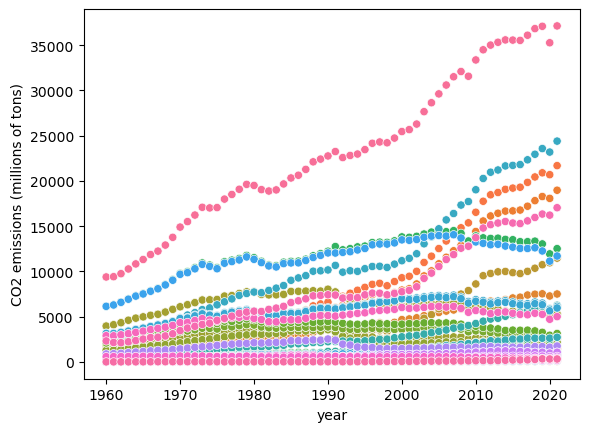

In [ ]:
import seaborn as sns
sns.scatterplot(data=mydf, x="year", y="co2", hue="country", legend=False).set(ylabel="CO2 emissions (millions of tons)")

## The above scatterplot is clearly not very useful to get any information out of. Let's get rid of any countries which do not have enough data from the past 62 years.

In [ ]:

num_datapoints = mydf["country"].value_counts().to_frame()
countries = num_datapoints.drop(num_datapoints[num_datapoints["country"] < 50].index) #List of all countries with data from more than 50 years.
mydf = mydf[mydf["country"].isin(countries.index.tolist())] #drop any rows from countries which do not have data from more than 50 years.

## To avoid the need of each group member cleaning the data, I am uploading this processed dataset to our repository

In [ ]:
mydf.to_csv("../data/processed/processedEmissoinsData.csv")

# Now that we have reduced the amount of countries further, let's group them up. This data set includes data for entire continents so let us group those together.

<AxesSubplot:xlabel='year', ylabel='co2'>

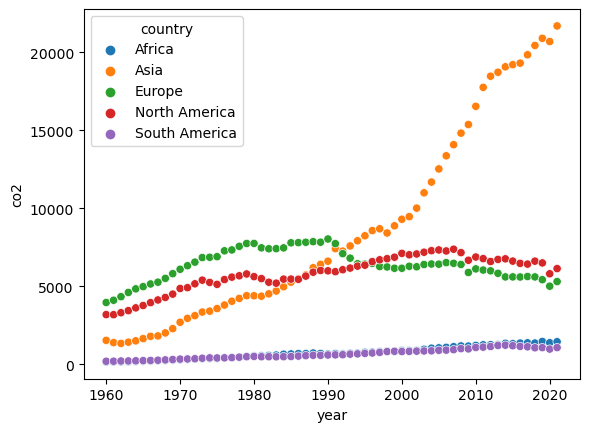

In [ ]:
continent_list = ["Africa","North America","Oceania", "South America", "Asia", "Europe"]
continents = mydf[mydf["country"].isin(continent_list)].reset_index()
sns.scatterplot(data=continents, x="year", y="co2", hue="country")

### Now group up some of the largest countries

<AxesSubplot:xlabel='year', ylabel='co2'>

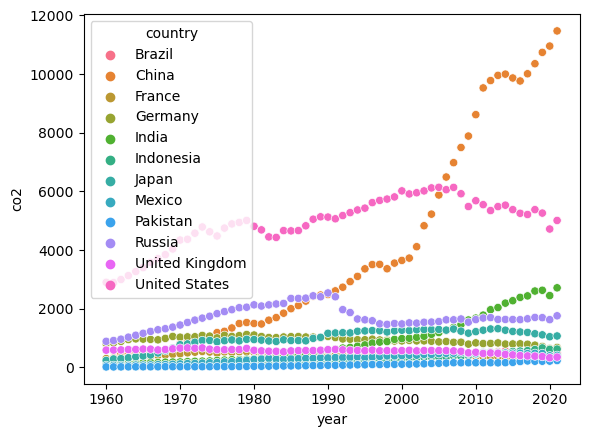

In [ ]:
largeCountryList = ["United States","Mexico","Russia","Pakistan","United Kingdom","Japan","Bangledesh","Brazil","China","India","Indonesia","France","Germany"]
largeCountries = mydf[mydf["country"].isin(largeCountryList)].reset_index()
sns.scatterplot(data=largeCountries, x="year", y="co2", hue="country")

## The data groups countries based on their income. We can also use this for further analysis

<AxesSubplot:xlabel='year', ylabel='co2'>

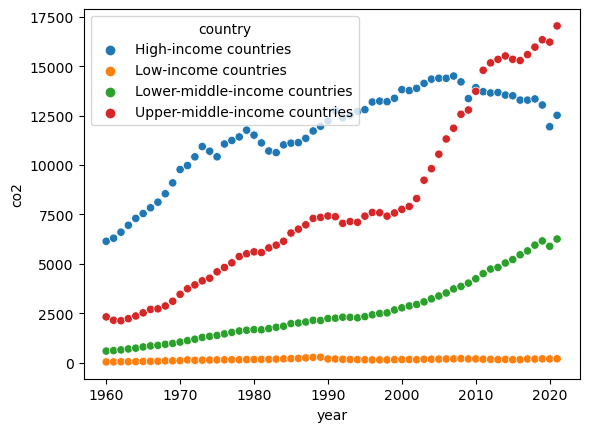

In [ ]:
incomeBasedList = ["Low-income countries","Lower-middle-income countries","Upper-middle-income countries","High-income countries"]
incomeBased = mydf[mydf["country"].isin(incomeBasedList)].reset_index()
sns.scatterplot(data=incomeBased, x="year", y="co2", hue="country")

# Cleaning the Temperature Dataframe